1. Explain InceptionNet with its modules.

Inception Net is used to avoid overfitting problems occured in VGG and Alexnet.This model goes deeper as well as wider.In inception net we have totally 9 modules.

this module uses different convolutional sizes eg,1x1,3x3,5x5..

In module1,one 5x5 can be replaced with two 3x3 .This helps in reducing the number of trainable parameters.

In module2,Symmetrical kernals can be breakdown into assymetrical kernals.

examples,5x5 kernals can be breakdown into 1x5 and 5x1.This helps in reducing the parameters a lot.

In module3,it goes much more wider.
example,using 3x3 followed by another 3x3 filters.instead of uning one 3x3,it goes 1x3 and 3x1.



2)Explain Residual Networks (ResNet) and discuss why they are considered advantageous compared to other architectures


Resnet helps to solve the problem of network degradation.

In Resnet we use skip connection.
Residual Networks (ResNet) is a type of deep neural network architecture which is used in problems where you need to train very deep networks.

ResNet MeritsMitigating the Vanishing Gradient Problem: With the help of residual connections, ResNet makes it easier for the gradients to flow through the network while backpropagating and avoid vanishing in very deep networks.

In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [20]:
dataset_directory='/content/drive/MyDrive/Sports-celebrity images'

In [21]:
def load_dataset(directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Assumes each subdirectory is a class

    for i, class_name in enumerate(class_names):
        class_directory = os.path.join(directory, class_name)
        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path)
                image = image.resize((150, 150))  # Resize if necessary
                image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
                images.append(image)
                labels.append(i)  # Store index of the class

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, class_names


In [24]:
images, labels, class_names = load_dataset(dataset_directory)

In [25]:
print("Loaded images shape:", images.shape)
print("Loaded labels shape: /n Images with Folder name", labels.shape, "/n Images with Folder name")

Loaded images shape: (441, 150, 150, 3)
Loaded labels shape: /n Images with Folder name (441,) /n Images with Folder name


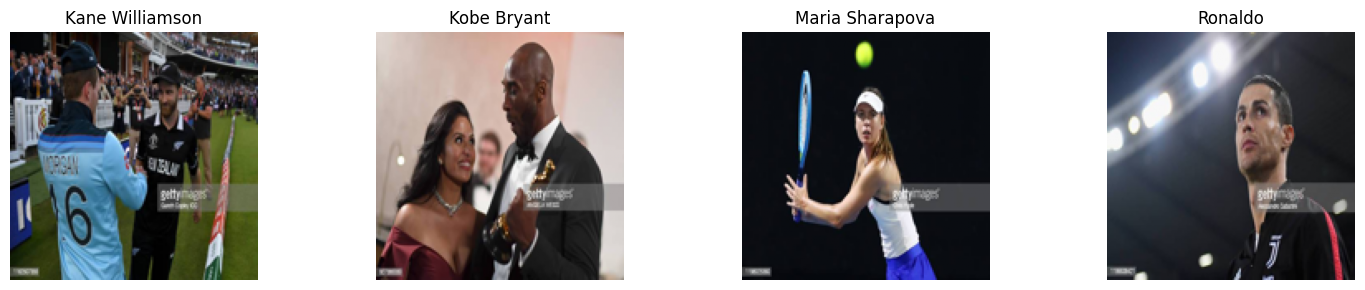

In [26]:
num_classes = len(class_names)
fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))

for i, class_name in enumerate(class_names):
    class_indices = np.where(labels == i)[0]
    example_image = images[class_indices[0]]
    axes[i].imshow(example_image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [28]:
import tensorflow as tf
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D

from keras import utils


In [32]:
base_dir=r"/content/drive/MyDrive/Sports-celebrity images"
#"E:\Study DS\dogs-vs-cats\train"

In [31]:
IMAGE_SIZE=224
BATCH_SIZE=128

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,   # Normalize pixel values to [0, 1]
    zoom_range=0.2,   # Randomly zoom images by 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    validation_split=0.1  # Reserve 10% of the data for validation
)

# ImageDataGenerator for validation data (testing data in this context)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,   # Normalize pixel values to [0, 1]
    validation_split=0.1  # Specify the same validation split as for training
)


In [35]:
train_generator = train_datagen.flow_from_directory(
    base_dir,                    # Path to the target directory
    target_size=(224, 224),  # Resize images to 224x224 pixels
    batch_size=32,
    class_mode='categorical',   # Number of images per batch
    subset='training'            # Use subset 'training' from the directory
)

validation_generator = validation_datagen.flow_from_directory(
    base_dir,                    # Path to the target directory
    target_size=(224,224),  # Resize images to 224x224 pixels
    batch_size=32,
    class_mode='categorical',# Number of images per batch
    subset='validation'          # Use subset 'validation' from the directory
)


Found 399 images belonging to 4 classes.
Found 42 images belonging to 4 classes.


In [37]:
from tensorflow.keras.layers import Input, Flatten, Dense  # Importing necessary layers from Keras
from tensorflow.keras.models import Model, Sequential  # Importing Model class and Sequential model from Keras
from tensorflow.keras.applications.vgg16 import VGG16  # Importing the VGG16 model architecture from Keras applications
from glob import glob  # Importing glob module to handle file path expansion


In [39]:
IMAGE_SIZE=[224,224]
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)   #image size 224*244*  and the 3 is 3 channel RGB and weight are similar to to imagenet dataset pre trained
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [40]:
for layer in vgg.layers:
    layer.trainable = False



In [42]:
from glob import glob  # Importing glob module to handle file path expansion

# Glob all folders in the specified directory
folders = glob(r"/content/drive/MyDrive/Sports-celebrity images")

# Print the number of folders found
print(len(folders))

1


In [44]:
x = Flatten()(vgg.output)  # Flatten the output of VGG16 to pass it to a fully connected Dense layer

# Create a Dense layer for predictions with softmax activation
prediction = Dense(len(folders), activation='softmax')(x)

# Define the model with VGG16's input and the Dense prediction layer as output
model = Model(inputs=vgg.input, outputs=prediction)

model.summary()  # Print a summary of the model architecture


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [50]:
model.compile(loss='categorical_crossentropy',   # Use binary cross-entropy loss function
              optimizer='adam',              # Use Adam optimizer for training
              metrics=['accuracy'])

In [53]:
epoch = 5  # Number of training epochs

history = model.fit(train_generator,            # Training data generator
                    batch_size=32,  # Number of steps (batches) per epoch
                    epochs=epoch,
                    verbose=1,# Number of epochs to train the model
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator)# Validation data generator
                     # Number of validation steps per epoch
                   )


Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node Adam/AssignAddVariableOp_3 defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-51-4d52cefcd968>", line 3, in <cell line: 3>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 1342, in apply_grad_to_update_var

  File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 241, in _update_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/adam.py", line 199, in update_step

Cannot update variable with shape [1] using a Tensor with shape [4], shapes must be equal.
	 [[{{node Adam/AssignAddVariableOp_3}}]] [Op:__inference_train_function_2876]